In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

#Load road shapefile 
"""Update shapefile under the nz_road to inlcude the crs information"""
road_data = gpd.read_file('./data/nz_road/nz-roads-road-section-geometry.shp')

EPSG:2193


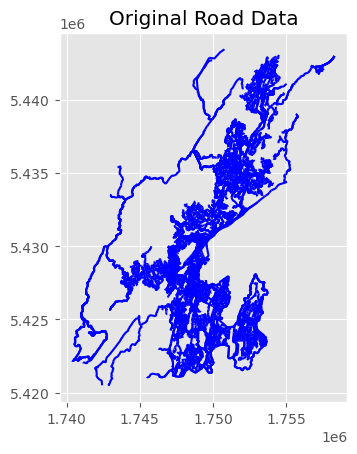

In [14]:
# Check the CRS of the crash data
#print(crash_data.crs)
print(road_data.crs)
# Plot the original road data
road_data.plot(color='blue', ax=plt.gca())
plt.title('Original Road Data')

plt.show()

In [15]:
# Load the CSV file with all the car crash data, this is for validation
cas_data = pd.read_csv('./data/Crash_Analysis_System_(CAS)_data.csv')

# Print the first few rows of the data
cas_data.head()

,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,...,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
0,1.561971e+06,5.176725e+06,66388959,NaN,587702.0,0.0,NaN,0.0,1.0,NaN,...,NaN,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine,Null
1,1.756263e+06,5.927631e+06,66388960,NaN,507900.0,0.0,NaN,1.0,0.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
2,1.755375e+06,5.912110e+06,66388961,NaN,518701.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
3,1.760027e+06,5.436020e+06,66388962,NaN,569100.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Light rain,Null
4,2.032005e+06,5.708227e+06,66388963,NaN,544002.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,Open,1.0,NaN,NaN,Light rain,Null


In [16]:
cas_data['region'].value_counts()

Auckland Region              294961
Waikato Region                91797
Canterbury Region             85376
Wellington Region             82639
Bay of Plenty Region          49287
Manawatū-Whanganui Region     48452
Otago Region                  46193
Northland Region              34910
Hawke's Bay Region            33585
Southland Region              20985
Taranaki Region               19453
Gisborne Region               10235
Marlborough Region             8573
Nelson Region                  8351
Tasman Region                  7898
West Coast Region              7529
Name: region, dtype: int64

In [17]:
## Get the data for the Wellington Region in the last 10 years
well_df = cas_data[(cas_data['region'] == 'Wellington Region')&(cas_data['crashYear'] > 2014)]
well_df.shape

(30464, 72)

In [18]:
# Load the car crash dataset from the GeoJSON file, this only includes the Wellington Region in last 10 years
well_crash_gdf = gpd.read_file('./data/Crash_Analysis_System_(CAS)_data.geojson')
# Ensure the CRS matches for both datasets
well_crash_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
print(well_crash_gdf.shape)
print(well_crash_gdf.shape[0] == well_df.shape[0])
well_crash_gdf.head()

(30464, 71)
True


,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashFinancialYear,...,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB,geometry
0,66388962,NaN,569100,0.0,NaN,0.0,2.0,NaN,Null,2017/2018,...,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Light rain,Null,POINT (174.90885 -41.21139)
1,66388964,NaN,571400,0.0,NaN,0.0,2.0,NaN,Null,2018/2019,...,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Light rain,Null,POINT (174.88102 -41.12506)
2,66388986,NaN,575300,0.0,0.0,0.0,1.0,1.0,South,2018/2019,...,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Light rain,Null,POINT (174.75760 -41.28854)
3,66388998,NaN,572600,0.0,0.0,0.0,2.0,0.0,North,2017/2018,...,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine,Null,POINT (174.82511 -41.16802)
4,66389034,NaN,577000,0.0,NaN,0.0,1.0,NaN,South,2019/2020,...,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null,POINT (174.81144 -41.32660)


In [20]:
# Load the TA GeoJSON file from stats NZ, this is used for validation boundary.
ta_gdf = gpd.read_file('./data/nz_ta.geojson')
# Ensure the CRS matches for both datasets
ta_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

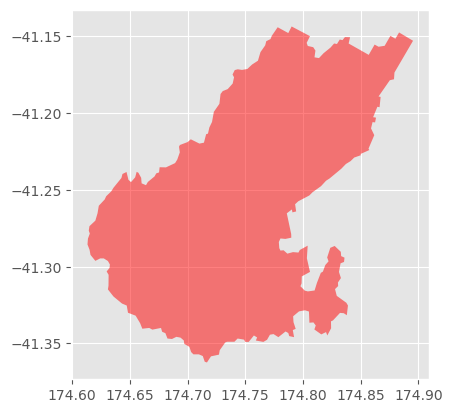

In [21]:
well_gdf = ta_gdf[ta_gdf['TA2016_NAM'] == 'Wellington City']
# Plot the Wellington boundary and the filtered crash data
fig, ax = plt.subplots()
well_gdf.plot(color='red', ax=ax, alpha=0.5)

plt.show()

In [22]:
## filter the car crash data to only include the crash in wellington city boundary
crash_within_boundary = well_crash_gdf[well_crash_gdf.geometry.intersects(well_gdf.unary_union)]
crash_within_boundary.shape

(12291, 71)

In [23]:
crash_within_boundary.head()

,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashFinancialYear,...,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB,geometry
2,66388986,NaN,575300,0.0,0.0,0.0,1.0,1.0,South,2018/2019,...,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Light rain,Null,POINT (174.75760 -41.28854)
3,66388998,NaN,572600,0.0,0.0,0.0,2.0,0.0,North,2017/2018,...,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine,Null,POINT (174.82511 -41.16802)
4,66389034,NaN,577000,0.0,NaN,0.0,1.0,NaN,South,2019/2020,...,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null,POINT (174.81144 -41.32660)
5,66389036,NaN,576800,0.0,NaN,0.0,0.0,NaN,East,2018/2019,...,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Light rain,Null,POINT (174.79145 -41.30418)
15,66389128,NaN,572900,0.0,NaN,0.0,2.0,NaN,Null,2017/2018,...,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null,POINT (174.77253 -41.27599)


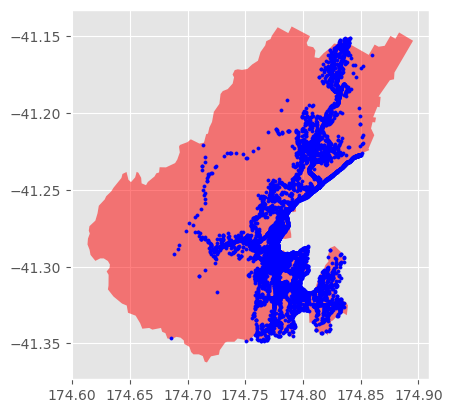

In [24]:
# Plot the Wellington boundary and the filtered crash data
fig, ax = plt.subplots()
well_gdf.plot(color='red', ax=ax, alpha=0.5)
crash_within_boundary.plot(ax=ax, color='blue', markersize=5)

plt.show()

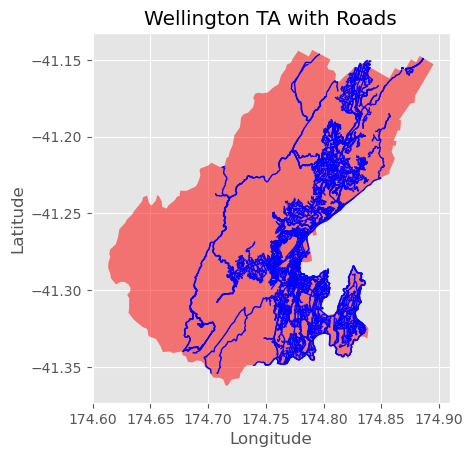

In [25]:
# Ensure road_data has the same CRS as well_gdf
road_data = road_data.to_crs(well_gdf.crs)

# Filter road_data to keep only the lines within well_gdf
road_within_wellington = road_data[road_data.geometry.intersects(well_gdf.unary_union)]

# Plot the Wellington boundary
ax = well_gdf.plot(color='red', ax=plt.gca(), alpha=0.5)

# Plot the filtered road data on top of the Wellington boundary
road_within_wellington.plot(ax=ax, color='blue', linewidth=1)

plt.title('Wellington TA with Roads')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Check data distribution
- make decision for how many years data to cover to have enough data points
- whether to include pandemic years(2020-2021)

In [26]:
crash_within_boundary.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 12291 entries, 2 to 30461
Data columns (total 71 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   OBJECTID                   12291 non-null  int64   
 1   advisorySpeed              151 non-null    float64 
 2   areaUnitID                 12291 non-null  int64   
 3   bicycle                    12291 non-null  float64 
 4   bridge                     4979 non-null   float64 
 5   bus                        12291 non-null  float64 
 6   carStationWagon            12291 non-null  float64 
 7   cliffBank                  4979 non-null   float64 
 8   crashDirectionDescription  12291 non-null  object  
 9   crashFinancialYear         12291 non-null  object  
 10  crashLocation1             12291 non-null  object  
 11  crashLocation2             12254 non-null  object  
 12  crashRoadSideRoad          0 non-null      object  
 13  crashSeverity          

In [27]:
# drop the geometry column to create a pandas dataframe
well_update_df = crash_within_boundary.drop(columns='geometry')
print(type(well_update_df))

# Create a new column to indicate if the crashYear is during the pandemic
well_update_df['if_pandemic'] = well_update_df['crashYear'].apply(lambda x: 1 if x in [2020, 2021] else 0)
well_update_df['crashYear'] = well_update_df['crashYear'].astype(int)
well_update_df.info()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12291 entries, 2 to 30461
Data columns (total 71 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OBJECTID                   12291 non-null  int64  
 1   advisorySpeed              151 non-null    float64
 2   areaUnitID                 12291 non-null  int64  
 3   bicycle                    12291 non-null  float64
 4   bridge                     4979 non-null   float64
 5   bus                        12291 non-null  float64
 6   carStationWagon            12291 non-null  float64
 7   cliffBank                  4979 non-null   float64
 8   crashDirectionDescription  12291 non-null  object 
 9   crashFinancialYear         12291 non-null  object 
 10  crashLocation1             12291 non-null  object 
 11  crashLocation2             12254 non-null  object 
 12  crashRoadSideRoad          0 non-null      object 
 13  crashSev

In [28]:
# Create a pivot table to count each year by crashSeverity
pivot_table = well_update_df.pivot_table(index='crashYear', columns='crashSeverity', aggfunc='size', fill_value=0)
pivot_table

crashSeverity,Fatal Crash,Minor Crash,Non-Injury Crash,Serious Crash
crashYear,,,,
2015,3,244,945,44
2016,2,268,1191,61
2017,1,330,1271,79
2018,4,341,1175,74
2019,1,336,1108,69
2020,4,243,983,49
2021,5,285,1020,62
2022,4,233,700,58
2023,3,288,635,48


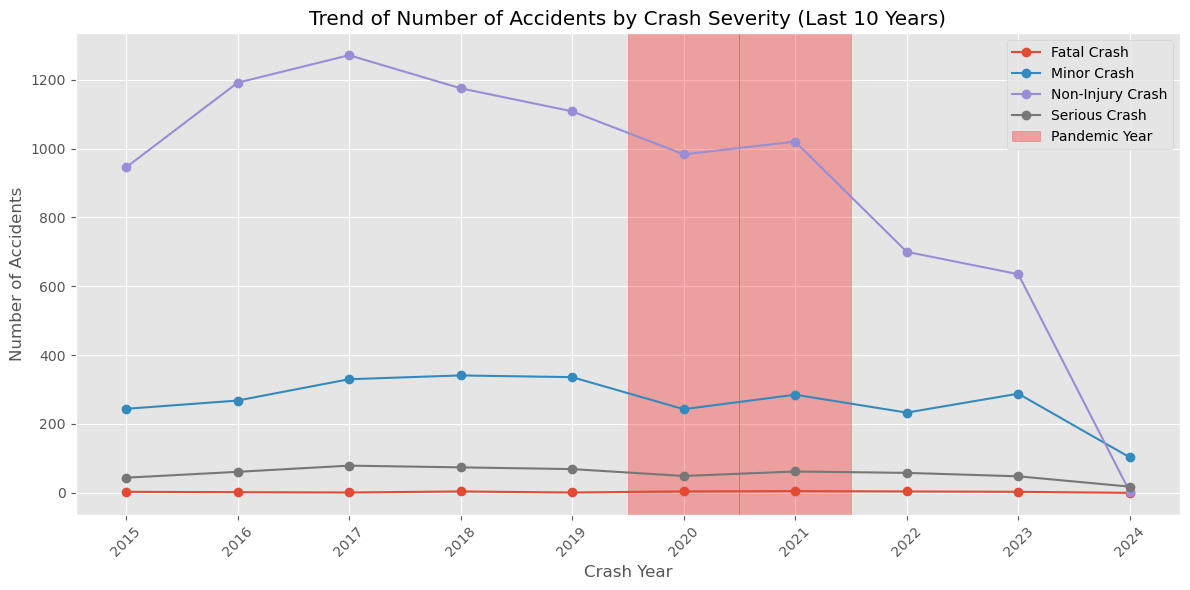

In [29]:

# Plot the trend of the number of accidents in each crashSeverity
plt.figure(figsize=(12, 6))
for severity in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[severity], marker='o', label=severity)

# Highlight the pandemic years
for year in [2020, 2021]:
    plt.axvspan(year - 0.5, year + 0.5, color='red', alpha=0.3, label='Pandemic Year' if year == 2020 else "")

plt.xlabel('Crash Year')
plt.ylabel('Number of Accidents')
plt.title('Trend of Number of Accidents by Crash Severity (Last 10 Years)')
plt.legend()
plt.xticks(pivot_table.index, rotation=45)
plt.tight_layout()
plt.show()

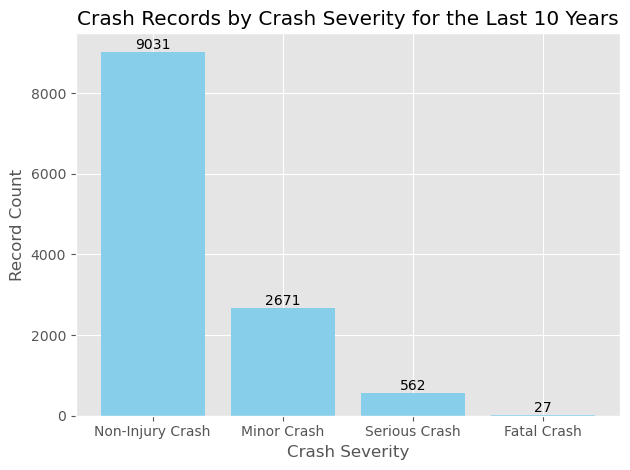

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Sum the records by crashSeverity
severity_sum = well_update_df.groupby('crashSeverity').size().reset_index(name='count')

# Define the desired order of crashSeverity
severity_order = ['Non-Injury Crash', 'Minor Crash', 'Serious Crash', 'Fatal Crash']
severity_sum['crashSeverity'] = pd.Categorical(severity_sum['crashSeverity'], categories=severity_order, ordered=True)
severity_sum = severity_sum.sort_values('crashSeverity')

# Plot a histogram (bar plot) of the summed records
plt.bar(severity_sum['crashSeverity'], severity_sum['count'], color='skyblue')

# Add count numbers on the bars
for index, value in enumerate(severity_sum['count']):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel('Crash Severity')
plt.ylabel('Record Count')
plt.title('Crash Records by Crash Severity for the Last 10 Years')
# plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [31]:
## Export the processed data to a new GeoJSON file and a CSV file
crash_within_boundary.to_file('./data/wellington_crash.geojson', driver='GeoJSON')
well_update_df.to_csv('./data/wellington_crash.csv', index=False)